# NHL Player data.  This data was harvested from the NHL Stats website.

In [2]:
import pandas as pd
import json
import numpy as np
import os
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline


## Load the data.  Each season is stored in a separate file.  All the data will be loaded into a single Pandas dataframe.  The pandas dataframe will contain all player information since 1917.

In [19]:
playerdata = pd.DataFrame()
startYear = 1917

while startYear < 2018:
    yearField = str(startYear) + str(startYear+1)
    theUrl = 'http://www.nhl.com/stats/rest/skaters?isAggregate=true&reportType=basic&isGame=false&reportName=skatersummary&sort=[{%22property%22:%22points%22,%22direction%22:%22DESC%22}]&cayenneExp=gameTypeId=2and%20seasonId%3E='+yearField+'and%20seasonId%3C='+yearField
    response = urllib.request.urlopen(theUrl)
    data = response.read()
    text = data.decode('utf-8')
    jsonData = json.loads( text )
    yearData = pd.DataFrame.from_dict(jsonData['data'], orient='columns')
    yearData['year'] = startYear
    playerdata = playerdata.append(yearData)
    startYear += 1


#print( playerdata.count())
playerdata.tail(10)

C:\Anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,assists,faceoffWinPctg,gameWinningGoals,gamesPlayed,goals,otGoals,penaltyMinutes,playerBirthCity,playerBirthCountry,playerBirthDate,...,pointsPerGame,ppGoals,ppPoints,shGoals,shPoints,shiftsPerGame,shootingPctg,shots,timeOnIcePerGame,year
880,0.0,0,0.0,3.0,0.0,0.0,0.0,Vihti,FIN,1999-04-22,...,0.0,0,0,0,0,19,0,3,726.667,2017
881,0.0,0.3333,0.0,5.0,0.0,0.0,2.0,Brampton,CAN,1993-04-27,...,0.0,0,0,0,0,10.6,0,1,404.4,2017
882,0.0,0.6774,0.0,7.0,0.0,0.0,6.0,Miramichi,CAN,1989-05-20,...,0.0,0,0,0,0,12.2857,0,9,479.286,2017
883,0.0,0,0.0,4.0,0.0,0.0,2.0,Calgary,CAN,1994-02-14,...,0.0,0,0,0,0,10.25,0,0,438,2017
884,0.0,0,0.0,2.0,0.0,0.0,4.0,North York,CAN,1989-04-18,...,0.0,0,0,0,0,8,0,0,278.5,2017
885,0.0,0.5555,0.0,2.0,0.0,0.0,2.0,Repentigny,CAN,1995-03-27,...,0.0,0,0,0,0,12.5,0,1,433.5,2017
886,0.0,0,0.0,1.0,0.0,0.0,4.0,Fribourg,CHE,1994-04-05,...,0.0,0,0,0,0,9,0,0,323,2017
887,0.0,0,0.0,1.0,0.0,0.0,0.0,Molnlycke,SWE,1995-03-14,...,0.0,0,0,0,0,12,0,0,623,2017
888,0.0,0.6,0.0,1.0,0.0,0.0,0.0,Amos,CAN,1997-02-05,...,0.0,0,0,0,0,16,0,1,646,2017
889,0.0,0,0.0,5.0,0.0,0.0,2.0,Milwaukee,USA,1995-07-28,...,0.0,0,0,0,0,13.6,0,1,582,2017


In [20]:
# Print the columns
print( playerdata.columns )

Index(['assists', 'faceoffWinPctg', 'gameWinningGoals', 'gamesPlayed', 'goals',
       'otGoals', 'penaltyMinutes', 'playerBirthCity', 'playerBirthCountry',
       'playerBirthDate', 'playerBirthStateProvince',
       'playerDraftOverallPickNo', 'playerDraftRoundNo', 'playerDraftYear',
       'playerFirstName', 'playerHeight', 'playerId', 'playerInHockeyHof',
       'playerIsActive', 'playerLastName', 'playerName', 'playerNationality',
       'playerPositionCode', 'playerShootsCatches', 'playerWeight',
       'plusMinus', 'points', 'pointsPerGame', 'ppGoals', 'ppPoints',
       'shGoals', 'shPoints', 'shiftsPerGame', 'shootingPctg', 'shots',
       'timeOnIcePerGame', 'year'],
      dtype='object')


# Lets get the years for the dataset

In [21]:
years = playerdata['year'].unique()
years

array([1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017], dtype=int64)

In [22]:
# Print out the player and year that the most goals were scored
mostGoals = playerdata[['playerName', 'year', 'goals']] [playerdata.goals == playerdata.goals.max()]
print(mostGoals.to_string(index=False))

playerName  year  goals
Wayne Gretzky  1981   92.0


In [23]:
# What's the most goals scored in a season
print( playerdata.goals.max())

92.0


In [24]:
# print all players that played in 2017
print( playerdata['playerName'][playerdata.year == 2017])

0             Connor McDavid
1              Claude Giroux
2            Nikita Kucherov
3              Evgeni Malkin
4           Nathan MacKinnon
5                Taylor Hall
6               Anze Kopitar
7                Phil Kessel
8              Blake Wheeler
9              Sidney Crosby
10             Alex Ovechkin
11            Steven Stamkos
12             Brad Marchand
13             Mathew Barzal
14             Jakub Voracek
15              John Tavares
16            Mikko Rantanen
17           Johnny Gaudreau
18          Evgeny Kuznetsov
19            Artemi Panarin
20            David Pastrnak
21                Jamie Benn
22              Tyler Seguin
23         Aleksander Barkov
24          William Karlsson
25            Sean Couturier
26                Eric Staal
27              Patrick Kane
28          Vincent Trocheck
29     Jonathan Marchessault
               ...          
860           Steven Fogarty
861        Michael Bournival
862             Beau Bennett
863           

In [25]:
# Print out all the players that scored over 40 goals in the 2017-18 season
playerdata.query( 'goals > 40 and year == 2017')['playerName']

0       Connor McDavid
3        Evgeni Malkin
10       Alex Ovechkin
24    William Karlsson
26          Eric Staal
33        Patrik Laine
Name: playerName, dtype: object

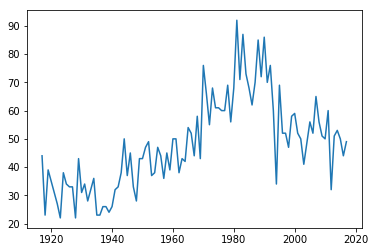

In [26]:
# Max goals per year graphed out
maxGoalsPerYear = pd.DataFrame(columns=['year','goals'])
for year in years:
    maxGoalsForYear = playerdata[['playerName','goals','year']].query('year == @year').goals.max()
    maxGoalsPerYear = maxGoalsPerYear.append({'year':year, 'goals':maxGoalsForYear}, ignore_index=True)

plt.plot(maxGoalsPerYear['year'], maxGoalsPerYear['goals'])

In [27]:
for year in years:
    y = playerdata.query('year == @year')
    maxgoals = y.goals.max()
    print( "{} {} {}".format(year, maxgoals, y.query('goals == @maxgoals')['playerName'].to_string(index=False)))

1917 44.0 Joe Malone
1918 23.0 Newsy Lalonde
1919 39.0 Joe Malone
1920 35.0 Babe Dye
1921 31.0 Punch Broadbent
       Babe Dye
1922 27.0 Babe Dye
1923 22.0 Cy Denneny
1924 38.0 Babe Dye
1925 34.0 Nels Stewart
1926 33.0 Bill Cook
1927 33.0 Howie Morenz
1928 22.0 Ace Bailey
1929 43.0 Cooney Weiland
1930 31.0 Charlie Conacher
1931 34.0 Charlie Conacher
1932 28.0 Bill Cook
1933 32.0 Charlie Conacher
1934 36.0 Charlie Conacher
1935 23.0 Charlie Conacher
      Bill Thoms
1936 23.0 Larry Aurie
Nels Stewart
1937 26.0 Gordie Drillon
1938 26.0 Roy Conacher
1939 24.0 Bryan Hextall Sr.
1940 26.0 Bryan Hextall Sr.
1941 32.0 Lynn Patrick
1942 33.0 Doug Bentley
1943 38.0 Doug Bentley
1944 50.0 Maurice Richard
1945 37.0 Gaye Stewart
1946 45.0 Maurice Richard
1947 33.0 Ted Lindsay
1948 28.0 Sid Abel
1949 43.0 Maurice Richard
1950 43.0 Gordie Howe
1951 47.0 Gordie Howe
1952 49.0 Gordie Howe
1953 37.0 Maurice Richard
1954 38.0 Bernie Geoffrion
 Maurice Richard
1955 47.0 Jean Beliveau
1956 44.0 Gordie How

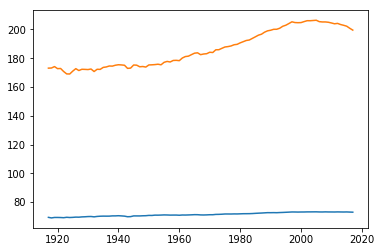

In [28]:
# Average height and weight of players over the years
height = pd.DataFrame(columns=['year','height','weight'])
for year in years:
    y = playerdata.query('year == @year')
    height = height.append({'year':year, 'height':y['playerHeight'].mean(), 'weight':y['playerWeight'].mean()}, ignore_index=True)

plt.plot(height['year'], height['height'])
plt.plot(height['year'], height['weight'])

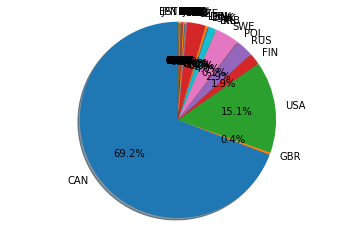

In [29]:
# Generate pie charts with player nationality
nationality = pd.DataFrame()
countries = playerdata.playerBirthCountry.unique()
for country in countries:
    count = playerdata.query('playerNationality == @country')['playerName'].count()
    nationality = nationality.append({'country':country, 'count':count}, ignore_index=True)

fig1, ax1 = plt.subplots()
ax1.pie(nationality['count'], labels=nationality['country'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.plot(figsize=(230,230))
plt.show()

In [30]:
def plotPlayerInfo(player):
    player = playerdata.query('playerName == @player')
    fo = plt.plot(player['year'], player['faceoffWinPctg'], label='faceoffWinPctg')
    gp = plt.plot(player['year'], player['gamesPlayed'], label='gamesPlayed')
    ss = plt.plot(player['year'], player['assists'], label='assists')
    go = plt.plot(player['year'], player['goals'], label='goals')
    pm = plt.plot(player['year'], player['penaltyMinutes'], label='penaltyMinutes')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

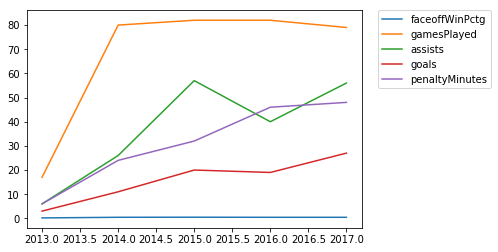

In [31]:
# Plot out some stats for an individual player
plotPlayerInfo('Evgeny Kuznetsov')

In [32]:
# Who had the most goals in the year in which they were drafted.
topPicks = playerdata.query('playerDraftOverallPickNo == 1 & playerDraftYear == year')
maxRookieGoals = topPicks.goals.max()
print( topPicks.query('goals == @maxRookieGoals')['playerName'] )

11    Dale Hawerchuk
Name: playerName, dtype: object


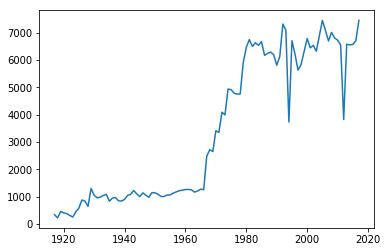

In [33]:
# Total goals per year graphed out
totalGoalsPerYear = pd.DataFrame(columns=['year','goals'])
for year in years:
    totalGoalsForYear = playerdata[['playerName','goals','year']].query('year == @year').goals.sum()
    totalGoalsPerYear = totalGoalsPerYear.append({'year':year, 'goals':totalGoalsForYear}, ignore_index=True)

plt.plot(totalGoalsPerYear['year'], totalGoalsPerYear['goals'])